In [2]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

## Notes
X=number of times she correctlly chose tea first
<dv>
M=8
<dv>
n=4
<dv>
N=4 #she is only picking 4 at random to have milk added first in them according to the null hypothesis, thus she would clearly be choosing the other 4 as milk added last
<dv>
So this is hypergeometric, which differs from binomial due to no replacement
<dv>
So in this case, X is 3 is our test statistic

Step 1: 
<dv>
    H_o =  The lady cannot tell whether milk was added first or not, and has a 50% chance of either.
<dv>
    H_a =  The lady can tell whether milk was added first or not.

Step 2: Our test statistic is the number of cups of tea that the woman claims to have had milk added first, that in fact have milk added first. So in our sample above, our test statistic is 3.

Step 3: ...

In [33]:
M, n, N= 8, 4, 4
sim=stats.hypergeom.rvs(M, n, N, size=100000)
p_val_from_sim=(sim>=3).sum()/100000
print('P_value from simulation:', p_val_from_sim)
p_val_from_cdf=1-stats.hypergeom.cdf(2, M, n, N)
print('P value from cdf:', p_val_from_cdf)

P_value from simulation: 0.24449
P value from cdf: 0.24285714285714288


Step 4: We fail to reject the null hypothesis that the lady cannot tell the difference, because the p value is 24%, which is certainly within the 5% limit of plausability. Thus this could be a fairly likely occurence.

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [19]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: 
<dv>
    H_o =  There is no difference in mean sepal width between the birginica and versicolor species.
<dv>
    H_1 =  The Virginica species has a larger mean sepal width than that of Versicolor.
<dv>
    H_2 =  The Versicolor species has a larger mean sepal width than that of Virginica.

Step 2: Our test statistic is the difference in sample mean between versicular and viginica sepal widths.

Step 3: ...

In [34]:
#This is our sample
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
iris_sub.show(5)
observed=np.diff(iris_sub.group(0,np.mean).column(1))[0]
print('Our observed values for sepal width difference in this data set is:', observed)

species,sepal_width
versicolor,3.2
versicolor,3.2
versicolor,3.1
versicolor,2.3
versicolor,2.8


Our observed values for sepal width difference in this data set is: 0.20399999999999974


[-0.04  -0.048  0.044 ...  0.004  0.02  -0.04 ]
P_value from simulation: 0.0006


C:\Users\C20Coen.Williams\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


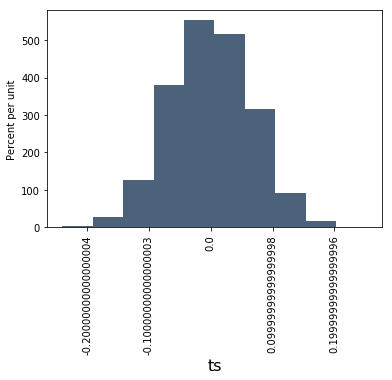

In [36]:
#Assuming that there is no difference between the two iris's sepal widths, then we can sample from the entire data set.
num_obs=iris_sub.num_rows
ts=[]
for i in np.arange(10000):
    iris_sample=iris_sub.with_column('sampled', iris_sub.sample(num_obs, with_replacement=False).column(1))
    ts=np.append(ts, np.diff(iris_sample.group(0, np.mean).column(2))[0])
print(ts)
Table().with_column('ts', ts).hist(0)
p_val_from_sim=(ts>=observed).sum()/10000
print('P_value from simulation:', p_val_from_sim)

Step 4: We can reject the null hypothesis, and accept the first alternate hypothesis, that the virginica sepal width is larger than the versicolor. This is because the likelyhood of our test statistic from our sample, if the null hypothesis were to be true, was .0006, which is clearly less than 5%.